In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Md-Naz/Assignment_2/main/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-15,450.309998,456.570007,442.500000,448.880005,448.880005,35672400
1,2020-10-16,454.440002,455.950012,438.850006,439.670013,439.670013,32775900
2,2020-10-19,446.239990,447.000000,428.869995,430.829987,430.829987,36287800
3,2020-10-20,431.750000,431.750000,419.049988,421.940002,421.940002,31656300
4,2020-10-21,422.700012,432.950012,421.250000,422.640015,422.640015,32370500
...,...,...,...,...,...,...,...
248,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
249,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
250,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100
251,2021-10-14,815.489990,820.250000,813.349976,818.320007,818.320007,12203200


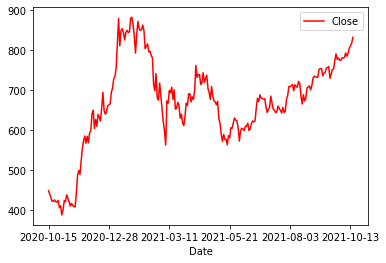

In [5]:
ax1 = df.plot(kind='line', x='Date', y='Close', color='r')

In [6]:
# datetofloat: is a function, it transforms the date from string to float, it calculate the days from 01 01 2020
# I added "Date in days from 1 Jan 2020" to the dataframe to use it later in training the models
date_in_days = [] 
def datetofloat(x):
    str_list = x.split("-")
    days_in_year = (int(str_list[0]) - 2020)*360
    days_in_month = (int(str_list[1]) - 1)*30
    days = int(str_list[2]) - 1
    return (days_in_year + days_in_month + days) 
for date in df["Date"]:
    date_in_days.append(datetofloat(date))
df["Date in days from 1 Jan 2020"] = date_in_days
df

,Date,Open,High,Low,Close,Adj Close,Volume,Date in days from 1 Jan 2020
0,2020-10-15,450.309998,456.570007,442.500000,448.880005,448.880005,35672400,284
1,2020-10-16,454.440002,455.950012,438.850006,439.670013,439.670013,32775900,285
2,2020-10-19,446.239990,447.000000,428.869995,430.829987,430.829987,36287800,288
3,2020-10-20,431.750000,431.750000,419.049988,421.940002,421.940002,31656300,289
4,2020-10-21,422.700012,432.950012,421.250000,422.640015,422.640015,32370500,290
...,...,...,...,...,...,...,...,...
248,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300,640
249,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000,641
250,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100,642
251,2021-10-14,815.489990,820.250000,813.349976,818.320007,818.320007,12203200,643


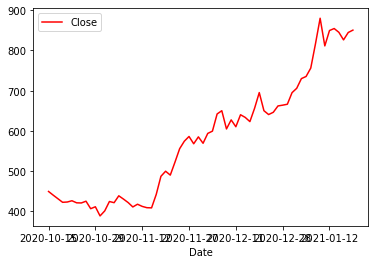

In [7]:
# I splitted the dataframe to 4 sub-dataframes based on date in order to get an increasing or decreasing graphs.    
df_to_Jan = df[("2020-10-15" <= df["Date"]) & (df["Date"] <= "2021-01-20")]
ax2 = df_to_Jan.plot(kind='line', x ='Date', y='Close', color='r') 


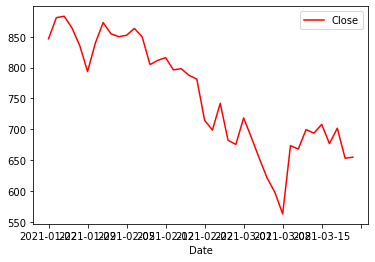

In [8]:
df_to_March = df[("2021-01-21" < df["Date"]) & (df["Date"] <= "2021-03-20")]
ax2 = df_to_March.plot(kind='line', x ='Date', y='Close', color='r') 

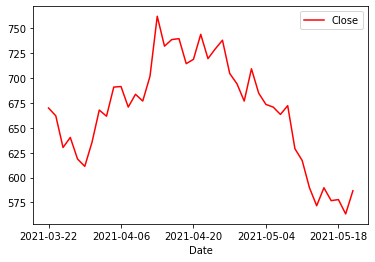

In [9]:
df_to_May = df[("2021-03-21" < df["Date"]) & (df["Date"] <= "2021-05-20")]
ax2 = df_to_May.plot(kind='line', x ='Date', y='Close', color='r') 

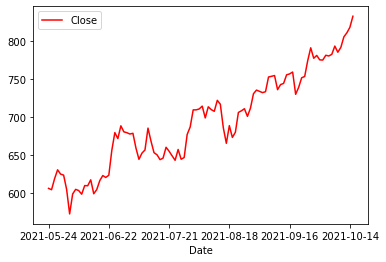

In [10]:
df_to_Oct = df[("2021-05-21" < df["Date"]) & (df["Date"] <= "2021-10-15")]
ax2 = df_to_Oct.plot(kind='line', x ='Date', y='Close', color='r') 


In [11]:
# prepare the inputs for training the model:

x = [pd.DataFrame(df_to_Jan["Date in days from 1 Jan 2020"]),pd.DataFrame(df_to_March["Date in days from 1 Jan 2020"]),pd.DataFrame(df_to_May["Date in days from 1 Jan 2020"]),pd.DataFrame(df_to_Oct["Date in days from 1 Jan 2020"])]
y = [pd.DataFrame(df_to_Jan["Close"]),pd.DataFrame(df_to_March["Close"]),pd.DataFrame(df_to_May["Close"]),pd.DataFrame(df_to_Oct["Close"])]
x_train = [0,0,0,0]
x_test = [0,0,0,0]
y_train = [0,0,0,0]
y_test = [0,0,0,0]
for i in range(4):
    x_train[i], x_test[i], y_train[i], y_test[i] = train_test_split(x[i], y[i], test_size=0.33, random_state=42)


In [12]:
# Training the models:
linear_regressor_Jan = LinearRegression()
linear_regressor_March = LinearRegression()
linear_regressor_May = LinearRegression()
linear_regressor_Oct = LinearRegression()
models = [linear_regressor_Jan,linear_regressor_March,linear_regressor_May,linear_regressor_Oct]
Y_pred = [0,0,0,0]
for i in range(4):
    models[i].fit(x_train[i], y_train[i]) 
    Y_pred[i] = models[i].predict(x_train[i]) 

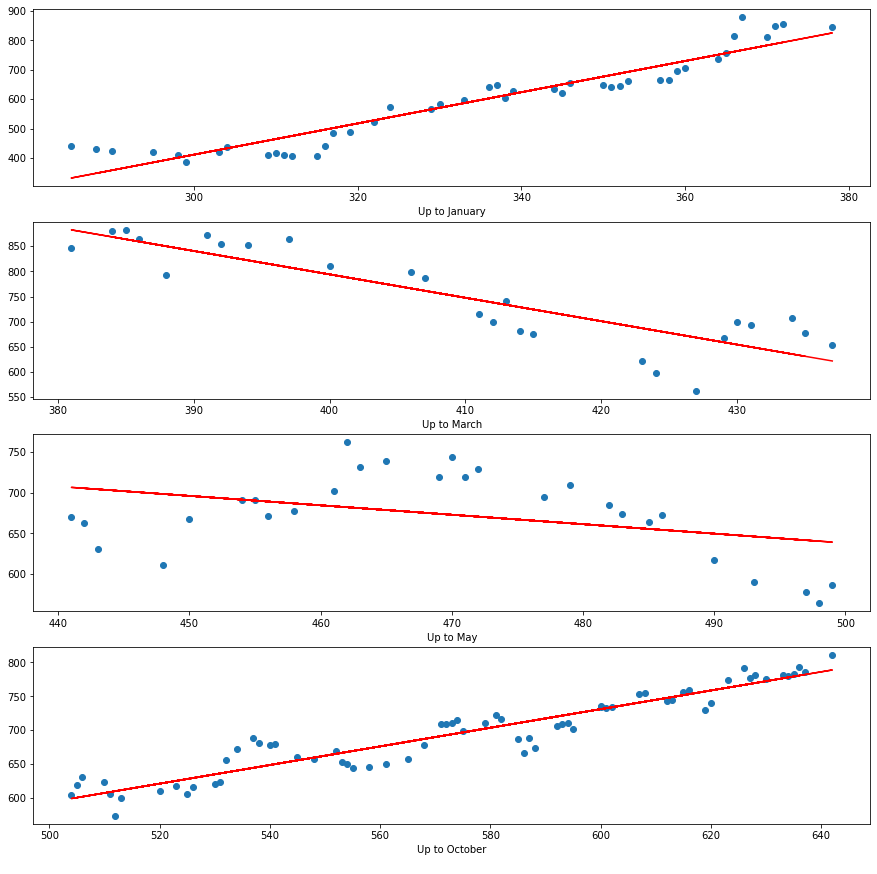

In [16]:
# plotting the results for all the models:
periodes = ["Up to January\n","Up to March\n","Up to May\n", "Up to October\n"]
fig, ax = plt.subplots(4, figsize=(15, 15)) #Figsize ( length, height )
for i in range(4):
    ax[i].scatter(x_train[i], y_train[i])             #Plot blue dots with real data
    ax[i].plot(x_train[i], Y_pred[i], color='red')    #Plot red line with prediction
    ax[i].set_xlabel(periodes[i])

In [24]:
# find_price(date): is a function takes date as an input and find which model includes the input date, and print hte results. 

def find_price(date):
    x = datetofloat(date)
    if(284 <= x <= 379):
        print((models[0].predict([[x]]))[0][0])
    elif(284 <= x <= 438):
        print((models[0].predict([[x]]))[0][0])
    elif(441 <= x <= 449):
        print((models[0].predict([[x]]))[0][0])
    elif(503 <= x <= 644):
        print((models[0].predict([[x]]))[0][0])
    else:
        print("Input date is out of range!")

        
        
date = input("Enter a date in form 'yyyy-mm-dd', between 2020-10-15 and 2021-10-15: ")
find_price(date)





Enter a date in form: yyyy-mm-dd, between 2020-10-15 and 2021-10-15: 2020-12-25
698.1102985019368


In [ ]:
# I chose the linear regression methode to analyse this dataframe, because in my opinion there is a correlation between the
# date and price. The price is getting up and down during the time of the year because of many factors. These factors could 
# be the oil price, finential capacity for the customers and many other factors could be non-visible for me. 
# 